In [62]:
# Importing Libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import sklearn
import warnings
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings("ignore")

In [64]:
# Loading the Datasets

In [65]:
df1  = pd.read_csv("https://raw.githubusercontent.com/itsahmedmohamedamin/Health-Care-Analytics-Predict-Diabetes/main/Dataset/labs.csv")
df2  = pd.read_csv("https://raw.githubusercontent.com/itsahmedmohamedamin/Health-Care-Analytics-Predict-Diabetes/main/Dataset/examination.csv")
df3  = pd.read_csv("https://raw.githubusercontent.com/itsahmedmohamedamin/Health-Care-Analytics-Predict-Diabetes/main/Dataset/demographic.csv")
df4  = pd.read_csv("https://raw.githubusercontent.com/itsahmedmohamedamin/Health-Care-Analytics-Predict-Diabetes/main/Dataset/diet.csv")
df5  = pd.read_csv("https://raw.githubusercontent.com/itsahmedmohamedamin/Health-Care-Analytics-Predict-Diabetes/main/Dataset/questionnaire.csv")

In [66]:
# SEQN = User ID so, we will drop it from all df's except the fitst one
df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

In [67]:
# Concatenate all the data in the same df
df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 1812 entries, SEQN to WHQ520
dtypes: float64(1753), int64(28), object(31)
memory usage: 135.7+ MB


In [69]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [70]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')

In [71]:
# Rename the columns with a readable name
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # Nan -> american i guess
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

In [72]:
df

,ID,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,67775.162806,88.0,0.88,4.9,...,NaN,NaN,130.0,122.0,NaN,168.0,48.0,NaN,NaN,NaN
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,6.0,6.0,117.0,10342.8,5.13,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,210.0,NaN,260.0,20.0,NaN,NaN,NaN
9811,83730,4.5,4.5,86.0,7602.4,5.23,NaN,NaN,NaN,NaN,...,NaN,NaN,120.0,100.0,NaN,125.0,42.0,NaN,NaN,NaN


In [73]:
# Edit the dataframe to contain only the readable data
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum',
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

In [74]:
df

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557,1,NaN,0.84,13.9,35.3,20.6,55.2,2.0
1,73558,1,NaN,1.78,9.1,34.7,24.4,61.5,2.0
2,73559,1,NaN,4.51,8.9,33.5,25.6,91.0,2.0
3,73560,1,NaN,2.52,NaN,21.0,14.9,32.2,2.0
4,73561,2,NaN,5.00,4.9,25.2,NaN,30.9,2.0
...,...,...,...,...,...,...,...,...,...
9808,83727,2,4.0,1.25,5.0,29.9,19.1,70.1,2.0
9809,83728,1,NaN,1.06,NaN,14.7,NaN,NaN,2.0
9810,83729,1,NaN,5.00,5.3,37.0,24.3,46.6,2.0
9811,83730,2,3.0,1.53,NaN,19.0,NaN,20.8,NaN


In [75]:
#year in us -> american : 0, not american : 1
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

In [76]:
#GlycoHemoglobin, Saggital Abdominal(median)
df['GlycoHemoglobin'] = df['GlycoHemoglobin'].fillna(df['GlycoHemoglobin'].median())
df['SaggitalAbdominal'] = df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median())
df['ArmCircum'] = df['ArmCircum'].fillna(df['ArmCircum'].median())
df['GripStrength'] = df['GripStrength'].fillna(df['GripStrength'].median())

In [77]:
#Family Income -> use ffill to fill na
df['Family_income'] = df['Family_income'].fillna(method='ffill')

In [78]:
#Breat_fed -> fill to 1
df['Breast_fed'] = df['Breast_fed'].fillna(value = 1)

In [79]:
# these lines of code remove low-variance features from the dataset, retaining only those features that exhibit sufficient variability
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df)

array([[7.3557e+04, 1.0000e+00, 0.0000e+00, ..., 3.5300e+01, 2.0600e+01,
        5.5200e+01],
       [7.3558e+04, 1.0000e+00, 0.0000e+00, ..., 3.4700e+01, 2.4400e+01,
        6.1500e+01],
       [7.3559e+04, 1.0000e+00, 0.0000e+00, ..., 3.3500e+01, 2.5600e+01,
        9.1000e+01],
       ...,
       [8.3729e+04, 1.0000e+00, 0.0000e+00, ..., 3.7000e+01, 2.4300e+01,
        4.6600e+01],
       [8.3730e+04, 2.0000e+00, 3.0000e+00, ..., 1.9000e+01, 2.0700e+01,
        2.0800e+01],
       [8.3731e+04, 2.0000e+00, 0.0000e+00, ..., 2.5000e+01, 1.7500e+01,
        3.6000e+01]])

In [80]:
df

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557,1,0.0,0.84,13.9,35.3,20.6,55.2,2.0
1,73558,1,0.0,1.78,9.1,34.7,24.4,61.5,2.0
2,73559,1,0.0,4.51,8.9,33.5,25.6,91.0,2.0
3,73560,1,0.0,2.52,5.4,21.0,14.9,32.2,2.0
4,73561,2,0.0,5.00,4.9,25.2,20.7,30.9,2.0
...,...,...,...,...,...,...,...,...,...
9808,83727,2,4.0,1.25,5.0,29.9,19.1,70.1,2.0
9809,83728,1,0.0,1.06,5.4,14.7,20.7,60.3,2.0
9810,83729,1,0.0,5.00,5.3,37.0,24.3,46.6,2.0
9811,83730,2,3.0,1.53,5.4,19.0,20.7,20.8,1.0


In [81]:
# these lines of code categorize individuals into three diabetes risk categories (0 for no diabetes, 1 for prediabetes or higher risk, and 2 for diabetes)
df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

In [82]:
df['Breast_fed'].unique()

array([2., 1.])

In [83]:
# Visualizing Data

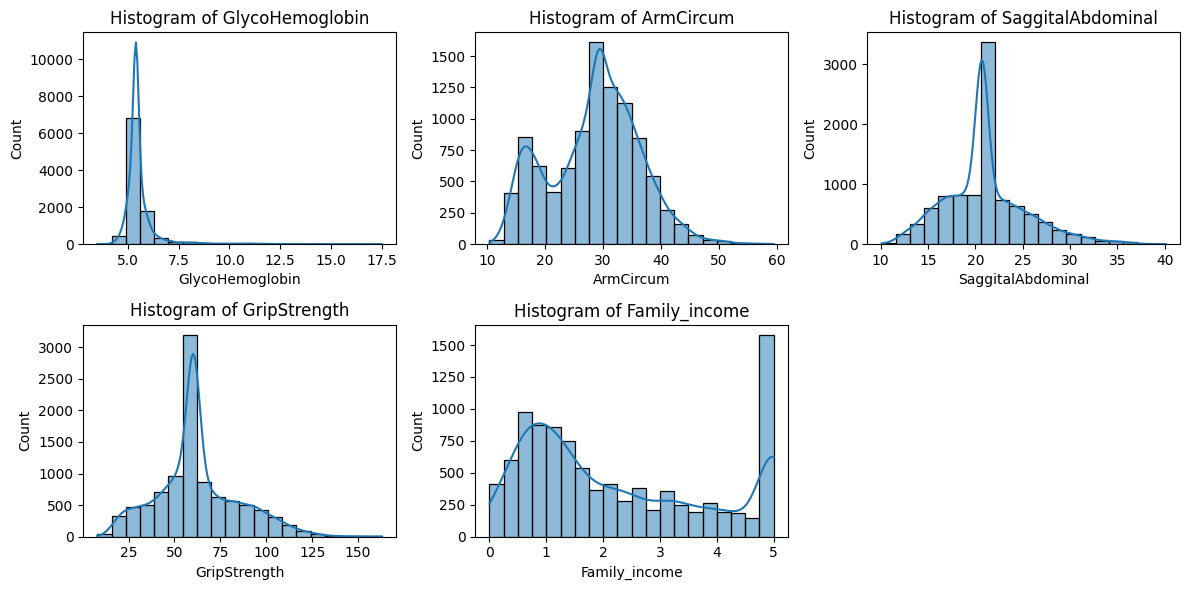

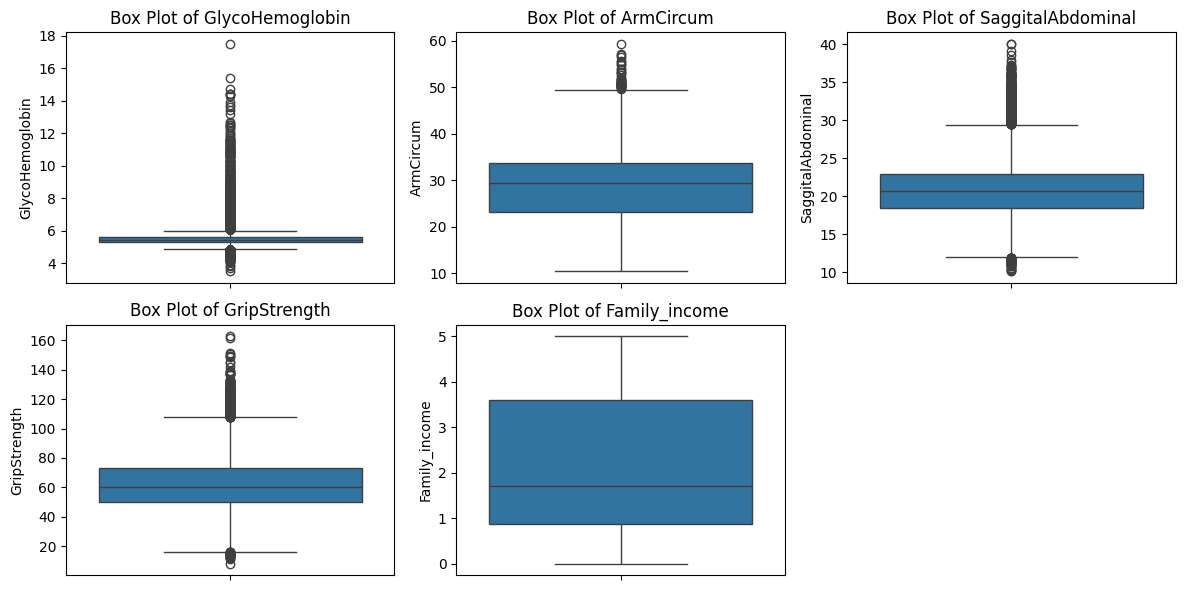

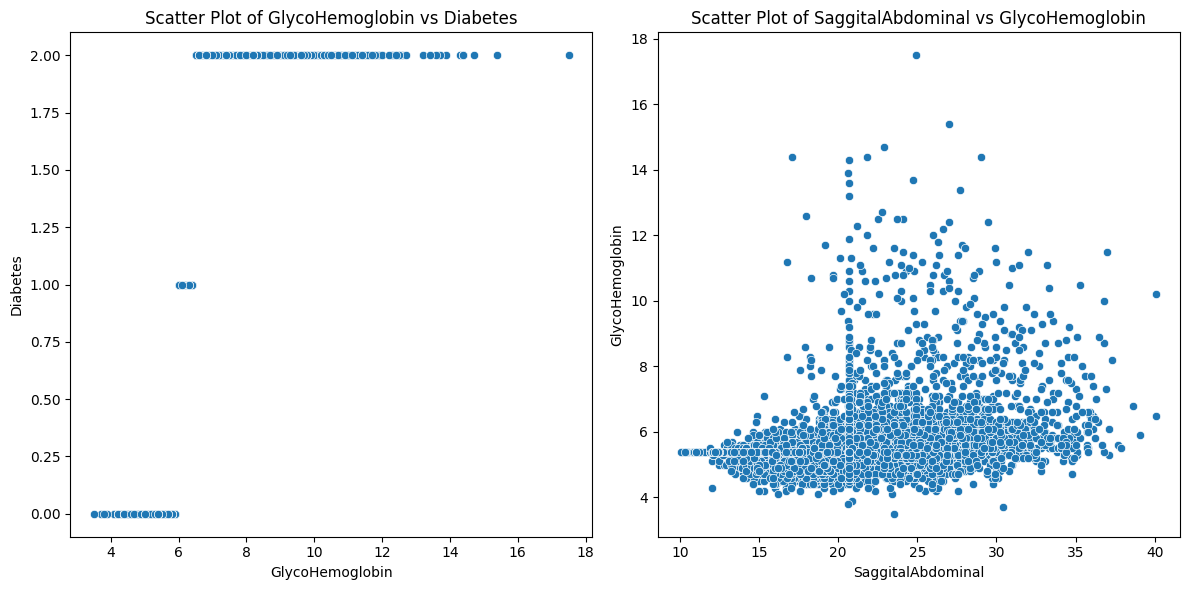

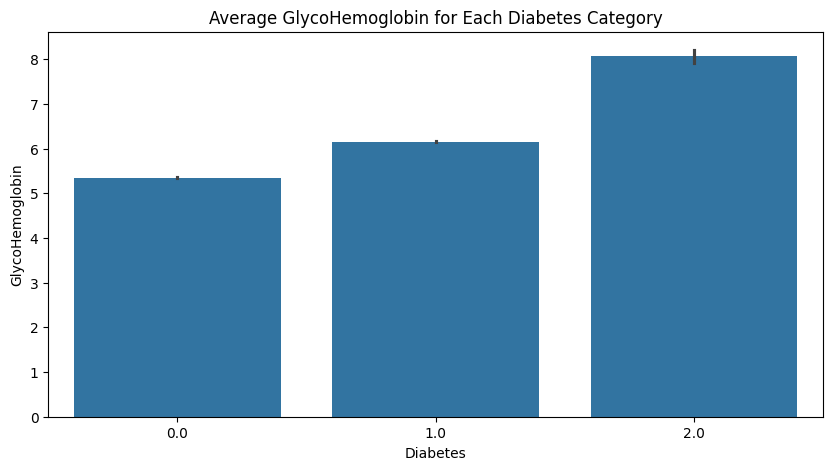

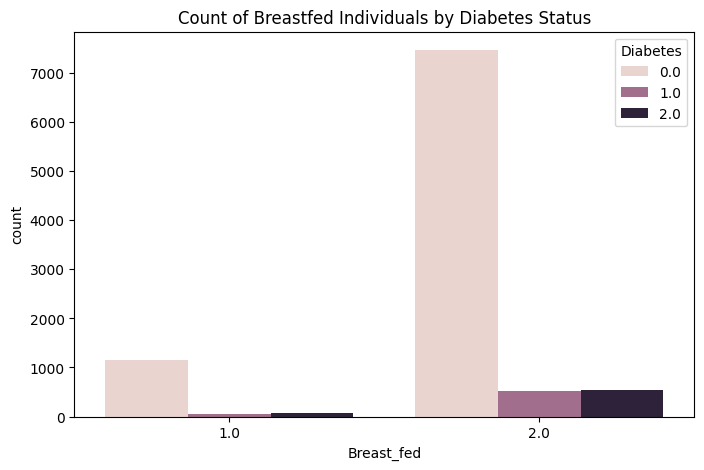

In [92]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(df['GlycoHemoglobin'], bins=20, kde=True)
plt.title('Histogram of GlycoHemoglobin')

plt.subplot(2, 3, 2)
sns.histplot(df['ArmCircum'], bins=20, kde=True)
plt.title('Histogram of ArmCircum')

plt.subplot(2, 3, 3)
sns.histplot(df['SaggitalAbdominal'], bins=20, kde=True)
plt.title('Histogram of SaggitalAbdominal')

plt.subplot(2, 3, 4)
sns.histplot(df['GripStrength'], bins=20, kde=True)
plt.title('Histogram of GripStrength')

plt.subplot(2, 3, 5)
sns.histplot(df['Family_income'], bins=20, kde=True)
plt.title('Histogram of Family_income')

plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(y='GlycoHemoglobin', data=df)
plt.title('Box Plot of GlycoHemoglobin')

plt.subplot(2, 3, 2)
sns.boxplot(y='ArmCircum', data=df)
plt.title('Box Plot of ArmCircum')

plt.subplot(2, 3, 3)
sns.boxplot(y='SaggitalAbdominal', data=df)
plt.title('Box Plot of SaggitalAbdominal')

plt.subplot(2, 3, 4)
sns.boxplot(y='GripStrength', data=df)
plt.title('Box Plot of GripStrength')

plt.subplot(2, 3, 5)
sns.boxplot(y='Family_income', data=df)
plt.title('Box Plot of Family_income')

plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='GlycoHemoglobin', y='Diabetes', data=df)
plt.title('Scatter Plot of GlycoHemoglobin vs Diabetes')

plt.subplot(1, 2, 2)
sns.scatterplot(x='SaggitalAbdominal', y='GlycoHemoglobin', data=df)
plt.title('Scatter Plot of SaggitalAbdominal vs GlycoHemoglobin')

plt.tight_layout()
plt.show()


# Bar Charts
plt.figure(figsize=(10, 5))
sns.barplot(x='Diabetes', y='GlycoHemoglobin', data=df)
plt.title('Average GlycoHemoglobin for Each Diabetes Category')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Breast_fed', hue='Diabetes', data=df)
plt.title('Count of Breastfed Individuals by Diabetes Status')
plt.show()


<Axes: >

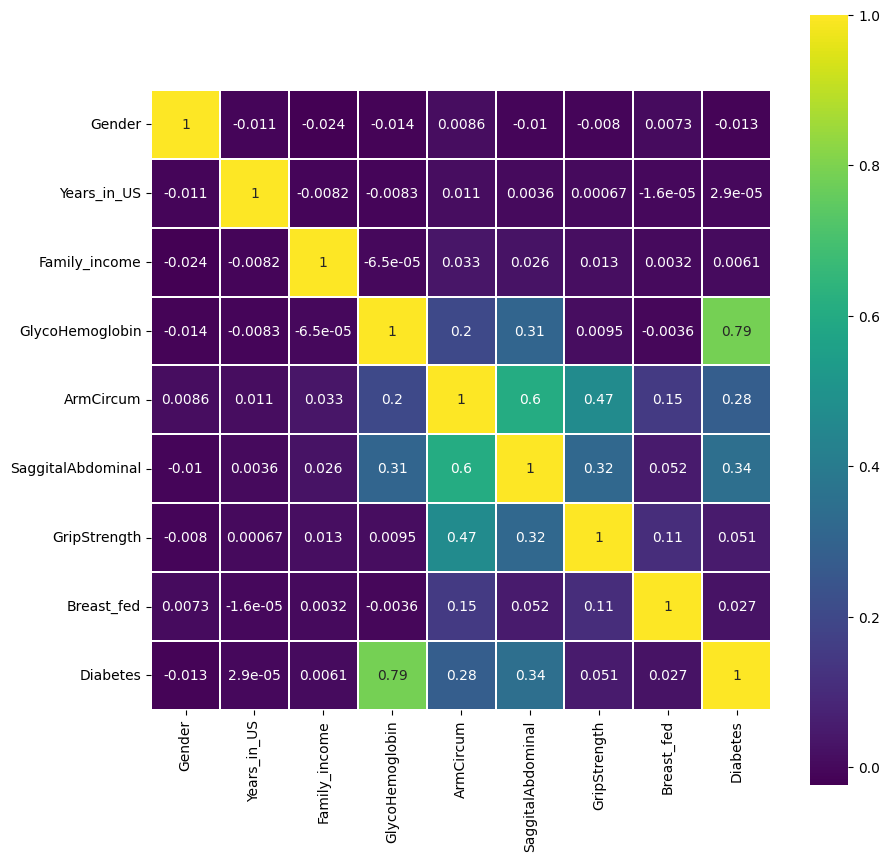

In [85]:
# Generate a corelattion map between the df important features
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.astype(float).drop(axis=1, labels='ID').corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [86]:
# Start the ANN Model to predict if the patient has a diabeties or not

In [87]:
# Building the model and training it
X = df[['GlycoHemoglobin', 'ArmCircum', 'SaggitalAbdominal', 'Gender', 'GripStrength', 'Breast_fed']]
y = df['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Use softmax activation for multi-class classification
])

# Compile the ANN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the ANN on the training set
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
197/197 [==============================] - 1s 4ms/step - loss: 0.3467 - accuracy: 0.8922 - val_loss: 0.1318 - val_accuracy: 0.9433
Epoch 2/100
197/197 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.9475 - val_loss: 0.0737 - val_accuracy: 0.9707
Epoch 3/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9613 - val_loss: 0.0530 - val_accuracy: 0.9790
Epoch 4/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0749 - accuracy: 0.9688 - val_loss: 0.0425 - val_accuracy: 0.9866
Epoch 5/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9717 - val_loss: 0.0400 - val_accuracy: 0.9815
Epoch 6/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0570 - accuracy: 0.9755 - val_loss: 0.0291 - val_accuracy: 0.9917
Epoch 7/100
197/197 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9839 - val_loss: 0.0226 - val_accuracy: 0.9936

In [88]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')

62/62 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Test accuracy: 100.00%


In [89]:
# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()

62/62 [==============================] - 0s 2ms/step


In [90]:
# Result dataframe between the actual result and the predicted one
df_result = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_result

,y_test,y_pred
6575,0.0,0
4347,0.0,0
5463,0.0,0
6204,0.0,0
4185,0.0,0
...,...,...
3523,0.0,0
8362,0.0,0
8456,0.0,0
7323,0.0,0


In [91]:
# result df for a specific actual value
df_result_filtered = df_result[df_result['y_test'] == 2]
df_result_filtered

,y_test,y_pred
3891,2.0,2
1334,2.0,2
1931,2.0,2
7931,2.0,2
565,2.0,2
...,...,...
1112,2.0,2
4266,2.0,2
6674,2.0,2
5494,2.0,2
